In [2]:
#Uploading the file
from google.colab import files
uploaded = files.upload()

Saving real-estate-sales.xlsx to real-estate-sales.xlsx


In [12]:
import pandas as pd

df = pd.read_excel("real-estate-sales.xlsx")

# Display first 5 rows
print(df.head())

   PropertyID  xrCompositeLandUseID  xrBuildingTypeID     ParcelID  \
0          30                     3               4.0  144-698-048   
1          50                     3               4.0  121-698-073   
2          58                     3               6.0  121-699-090   
3          66                     3               6.0  144-699-037   
4          78                     3               3.0  144-699-025   

   LocationStartNumber ApartmentUnitNumber StreetNameAndWay  \
0                 22.0                 NaN       BRISTOL ST   
1                164.0                 NaN    HOLLYWOOD AVE   
2                 87.0                 NaN       BRISTOL ST   
3                 55.0                 NaN       BRISTOL ST   
4                  5.0                 NaN       BRISTOL ST   

   xrPrimaryNeighborhoodID  LandSF  TotalFinishedArea  LivingUnits  \
0                        2  6000.0             1422.0          1.0   
1                        2  5650.0             1384.0       

In [4]:
#Total Sale per Quarter of the Real Estate

# Convert SaleDate to datetime format
df['SaleDate'] = pd.to_datetime(df['SaleDate'])

# Extract Year and Quarter
df['YearQuarter'] = df['SaleDate'].dt.to_period('Q')

# Calculate total sales per quarter
quarterly_sales = df.groupby('YearQuarter')['SalePrice'].sum().reset_index()

# Rename column and format values
quarterly_sales.rename(columns={'SalePrice': 'Sales Price ($)'}, inplace=True)
quarterly_sales['Sales Price ($)'] = quarterly_sales['Sales Price ($)'].apply(lambda x: f"{x:,.0f}")

# Display the result
print(quarterly_sales)

  YearQuarter Sales Price ($)
0      2018Q3      24,350,918
1      2018Q4     561,895,007
2      2019Q1     602,120,437
3      2019Q2     188,793,377
4      2019Q3     560,335,327
5      2019Q4   1,325,446,723
6      2020Q1      80,792,514
7      2020Q2      59,089,607
8      2020Q3      68,483,723


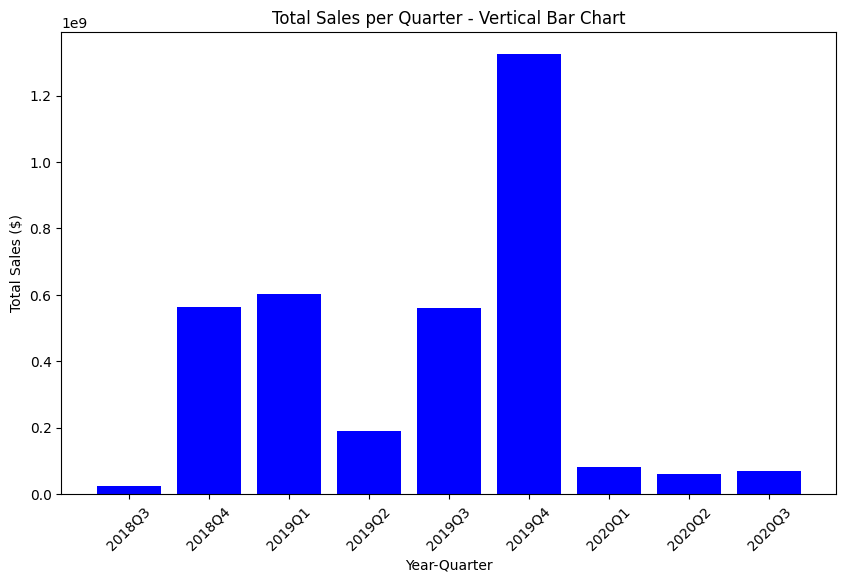

In [6]:
#Total Sale per Quarter of the Real Estate using Vertical Bar Chart
import matplotlib.pyplot as plt
import numpy as np

# Convert SaleDate to datetime format
df['SaleDate'] = pd.to_datetime(df['SaleDate'])

# Extract Year and Quarter
df['YearQuarter'] = df['SaleDate'].dt.to_period('Q')

# Calculate total sales per quarter
quarterly_sales = df.groupby('YearQuarter')['SalePrice'].sum().reset_index()

# Rename column and format values
quarterly_sales.rename(columns={'SalePrice': 'Sales Price ($)'}, inplace=True)

# Plot Vertical Bar Chart
plt.figure(figsize=(10, 6))
plt.bar(quarterly_sales['YearQuarter'].astype(str), quarterly_sales['Sales Price ($)'], color='blue')
plt.xlabel("Year-Quarter")
plt.ylabel("Total Sales ($)")
plt.title("Total Sales per Quarter - Vertical Bar Chart")
plt.xticks(rotation=45)
plt.show()

In [7]:
#Average Sale price per Area of the Real Estate
# Convert SaleDate to datetime format
df['SaleDate'] = pd.to_datetime(df['SaleDate'])

# Extract Year and Quarter
df['YearQuarter'] = df['SaleDate'].dt.to_period('Q')

# Calculate total sales per quarter
quarterly_sales = df.groupby('YearQuarter')['SalePrice'].sum().reset_index()

# Rename column and format values
quarterly_sales.rename(columns={'SalePrice': 'Sales Price ($)'}, inplace=True)
quarterly_sales['Sales Price ($)'] = quarterly_sales['Sales Price ($)'].apply(lambda x: f"{x:,.0f}")

# Calculate Average Sale Price per Area
df = df[df['TotalFinishedArea'] > 0]  # Avoid division by zero
average_price_per_area = df.groupby('YearQuarter').agg(
    {'SalePrice': 'sum', 'TotalFinishedArea': 'sum'}
)
average_price_per_area['Avg Price per SqFt ($)'] = average_price_per_area['SalePrice'] / average_price_per_area['TotalFinishedArea']
average_price_per_area = average_price_per_area[['Avg Price per SqFt ($)']].reset_index()

# Merge with quarterly sales data
quarterly_sales = quarterly_sales.merge(average_price_per_area, on='YearQuarter')

# Display the result
print(quarterly_sales)

  YearQuarter Sales Price ($)  Avg Price per SqFt ($)
0      2018Q3      24,350,918               33.199976
1      2018Q4     561,895,007               89.161898
2      2019Q1     602,120,437              201.556382
3      2019Q2     188,793,377               50.633327
4      2019Q3     560,335,327              216.127884
5      2019Q4   1,325,446,723              474.615568
6      2020Q1      80,792,514               25.082193
7      2020Q2      59,089,607               55.402123
8      2020Q3      68,483,723               68.865353


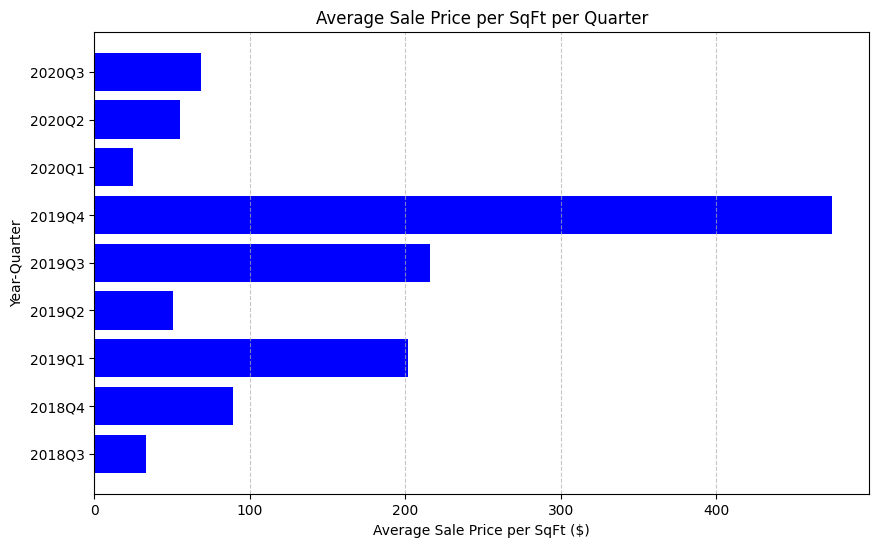

In [9]:
# Plot Horizontal Bar Chart
plt.figure(figsize=(10, 6))
plt.barh(average_price_per_area["YearQuarter"].astype(str), average_price_per_area["Avg Price per SqFt ($)"], color='blue')
plt.xlabel("Average Sale Price per SqFt ($)")
plt.ylabel("Year-Quarter")
plt.title("Average Sale Price per SqFt per Quarter")
plt.grid(axis='x', linestyle="--", alpha=0.7)

# Show the chart
plt.show()


In [10]:
# Display Which month has the biggest Sale

# Convert SaleDate to datetime format
df['SaleDate'] = pd.to_datetime(df['SaleDate'])

# Extract Year and Month
df['YearMonth'] = df['SaleDate'].dt.to_period('M')

# Calculate total sales per month
monthly_sales = df.groupby('YearMonth')['SalePrice'].sum().reset_index()

# Identify the month with the highest sales
max_sales_month = monthly_sales.loc[monthly_sales['SalePrice'].idxmax()]

# Display the result
print("Month with the highest sales:")
print(max_sales_month)

Month with the highest sales:
YearMonth       2019-12
SalePrice    1271100718
Name: 16, dtype: object


<Figure size 1200x600 with 0 Axes>

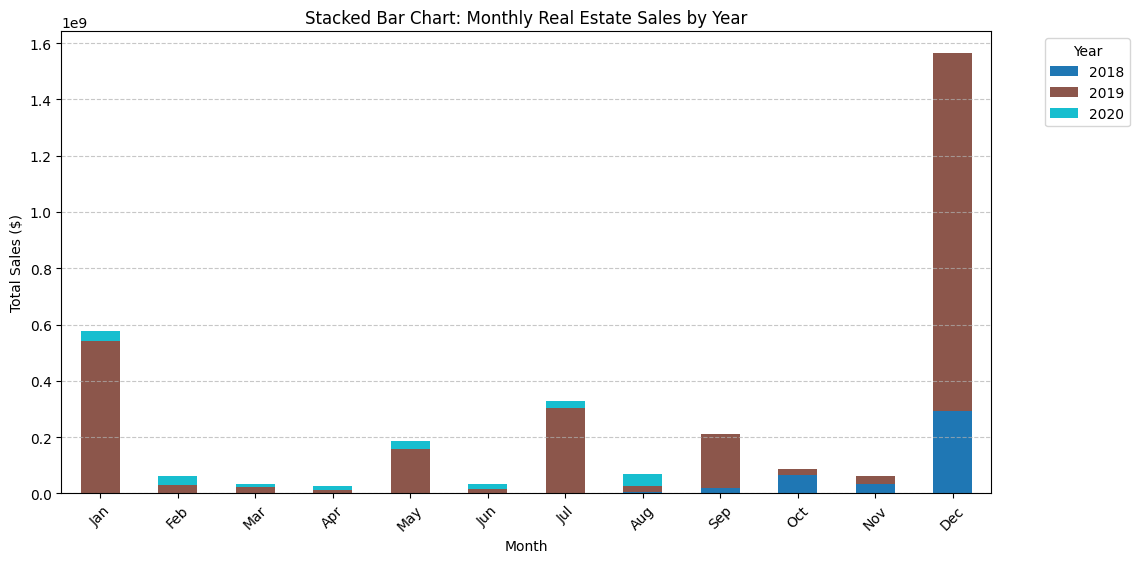

In [11]:
#Stacked BAr chart
# Extract Year and Month separately
df['Year'] = df['SaleDate'].dt.year
df['Month'] = df['SaleDate'].dt.strftime('%b')

# Calculate total sales per year and month
monthly_sales = df.groupby(['Year', 'Month'])['SalePrice'].sum().unstack(level=0)

# Sort months in calendar order
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthly_sales = monthly_sales.reindex(month_order)

# Plot the Stacked Bar Chart
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='bar', stacked=True, colormap='tab10', figsize=(12, 6))
plt.xlabel("Month")
plt.ylabel("Total Sales ($)")
plt.title("Stacked Bar Chart: Monthly Real Estate Sales by Year")
plt.legend(title="Year", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle="--", alpha=0.7)

# Show the chart
plt.show()